<a href="https://colab.research.google.com/github/copengkokngkeck45/BTTDLT/blob/main/MLBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
pip install squarify

In [87]:
import sqlite3
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import squarify
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [17]:

customers= pd.read_csv('data/olist_customers_dataset.csv')
geolocation= pd.read_csv("data/olist_geolocation_dataset.csv")
order_items= pd.read_csv('data/olist_order_items_dataset.csv')
order_payments= pd.read_csv('data/olist_order_payments_dataset.csv')
order_reviews= pd.read_csv('data/olist_order_reviews_dataset.csv')
orders= pd.read_csv('data/olist_orders_dataset.csv')
products= pd.read_csv('data/olist_products_dataset.csv')
sellers= pd.read_csv('data/olist_sellers_dataset.csv')
products_category_translation= pd.read_csv('data/product_category_name_translation.csv')

In [18]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [19]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [20]:
order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [21]:
order_payments

,payment_id,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,1,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,2,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,3,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,5,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...,...
103881,103882,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,103883,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,103884,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,103885,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [22]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,3/1/2018 0:00,3/2/2018 10:26
...,...,...,...,...,...,...,...
97616,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,7/7/2018 0:00,7/14/2018 17:18
97617,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,12/9/2017 0:00,12/11/2017 20:06
97618,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",3/22/2018 0:00,3/23/2018 9:10
97619,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,7/1/2018 0:00,7/2/2018 12:59


In [23]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [24]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [25]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [26]:
products_category_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [27]:
datasets = [customers, geolocation, order_items, order_payments, order_reviews, orders, products, sellers, products_category_translation]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"payment_id, order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,6,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",97621,7,0,143429,"review_comment_title, review_comment_message"
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


In [ ]:
order_reviews.isnull().sum()

In [28]:
# drop the review_comment_title column
order_reviews.drop(['review_comment_title'], axis=1, inplace=True)
# replace missing review messages with string 'NONE'
order_reviews['review_comment_message'] = order_reviews['review_comment_message'].fillna('NONE')
# check for missing values
order_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [29]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [30]:
orders["order_approved_at"] = orders["order_approved_at"].fillna(orders["order_purchase_timestamp"])
orders["order_delivered_carrier_date"] = orders["order_delivered_carrier_date"].fillna(orders["order_approved_at"])
orders["order_delivered_customer_date"] = orders["order_delivered_customer_date"].fillna(orders["order_estimated_delivery_date"])
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [31]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [32]:
products[products['product_weight_g'].isnull()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
products['product_description_lenght'].fillna(products['product_description_lenght'].median,inplace=True)
products['product_photos_qty'].fillna(products['product_photos_qty'].median(), inplace=True)
products['product_weight_g'].fillna(products['product_weight_g'].median(), inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].median(), inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].median(), inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].median(), inplace=True)
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght      0
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [34]:
# check again
data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"payment_id, order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,6,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_message, review_creation_date, review_answer_timestamp",97621,6,0,0,
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,0,
6,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,1220,"product_category_name, product_name_lenght"
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


In [35]:
for column in geolocation.columns:
    if geolocation[column].duplicated().any():
        print(column)

geolocation_zip_code_prefix
geolocation_lat
geolocation_lng
geolocation_city
geolocation_state


In [36]:
# merge data
merged_df= pd.merge(customers, orders, on="customer_id")
merged_df= merged_df.merge(order_reviews, on="order_id")
merged_df= merged_df.merge(order_items, on="order_id")
merged_df= merged_df.merge(products, on="product_id")
merged_df= merged_df.merge(order_payments, on="order_id")
merged_df= merged_df.merge(sellers, on='seller_id')
merged_df= merged_df.merge(products_category_translation, on='product_category_name')
merged_df.shape

(113742, 40)

In [37]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113742 entries, 0 to 113741
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113742 non-null  object 
 1   customer_unique_id             113742 non-null  object 
 2   customer_zip_code_prefix       113742 non-null  int64  
 3   customer_city                  113742 non-null  object 
 4   customer_state                 113742 non-null  object 
 5   order_id                       113742 non-null  object 
 6   order_status                   113742 non-null  object 
 7   order_purchase_timestamp       113742 non-null  object 
 8   order_approved_at              113742 non-null  object 
 9   order_delivered_carrier_date   113742 non-null  object 
 10  order_delivered_customer_date  113742 non-null  object 
 11  order_estimated_delivery_date  113742 non-null  object 
 12  review_id                     

In [38]:
# convert datatype of some columns into time
time_columns= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
               'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']
merged_df[time_columns]=merged_df[time_columns].apply(pd.to_datetime)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113742 entries, 0 to 113741
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113742 non-null  object        
 1   customer_unique_id             113742 non-null  object        
 2   customer_zip_code_prefix       113742 non-null  int64         
 3   customer_city                  113742 non-null  object        
 4   customer_state                 113742 non-null  object        
 5   order_id                       113742 non-null  object        
 6   order_status                   113742 non-null  object        
 7   order_purchase_timestamp       113742 non-null  datetime64[ns]
 8   order_approved_at              113742 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113742 non-null  datetime64[ns]
 10  order_delivered_customer_date  113742 non-null  datetime64[ns]
 11  

In [39]:
present_day = merged_df['order_purchase_timestamp'].max() + dt.timedelta(days=2)
present_day

Timestamp('2018-08-31 15:00:37')

In [40]:
print("Latest date in dataset: ", merged_df['order_purchase_timestamp'].max())

Latest date in dataset:  2018-08-29 15:00:37


In [41]:
recency_df= pd.DataFrame(merged_df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max())
recency_df

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
92995,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
92996,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
92997,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
92998,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [42]:
recency_df['Recency']= recency_df['order_purchase_timestamp'].apply(lambda x: (present_day - x).days)
recency_df

,customer_unique_id,order_purchase_timestamp,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,113
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,116
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,538
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,322
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,289
...,...,...,...
92995,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,448
92996,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,263
92997,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,569
92998,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,120


In [43]:
frequency_df = pd.DataFrame(merged_df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)
frequency_df

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
92995,fffcf5a5ff07b0908bd4e2dbc735a684,1
92996,fffea47cd6d3cc0a88bd621562a9d061,1
92997,ffff371b4d645b6ecea244b27531430a,1
92998,ffff5962728ec6157033ef9805bacc48,1


In [44]:
monetary_df = merged_df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']
monetary_df

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
92995,fffcf5a5ff07b0908bd4e2dbc735a684,4134.84
92996,fffea47cd6d3cc0a88bd621562a9d061,84.58
92997,ffff371b4d645b6ecea244b27531430a,112.46
92998,ffff5962728ec6157033ef9805bacc48,133.69


In [45]:
RF_df = recency_df.merge(frequency_df, on='customer_unique_id')
RFM_df = RF_df.merge(monetary_df, on='customer_unique_id').drop(columns='order_purchase_timestamp')
RFM_df.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19
2,0000f46a3911fa3c0805444483337064,538,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89


In [46]:
RFM_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,93000.0,238.895409,153.105522,2.00,115.00,219.00,348.0000,725.00
Frequency,93000.0,1.026312,0.186035,1.00,1.00,1.00,1.0000,15.00
Monetary,93000.0,211.242705,627.452044,9.59,63.62,112.32,201.4225,109312.64


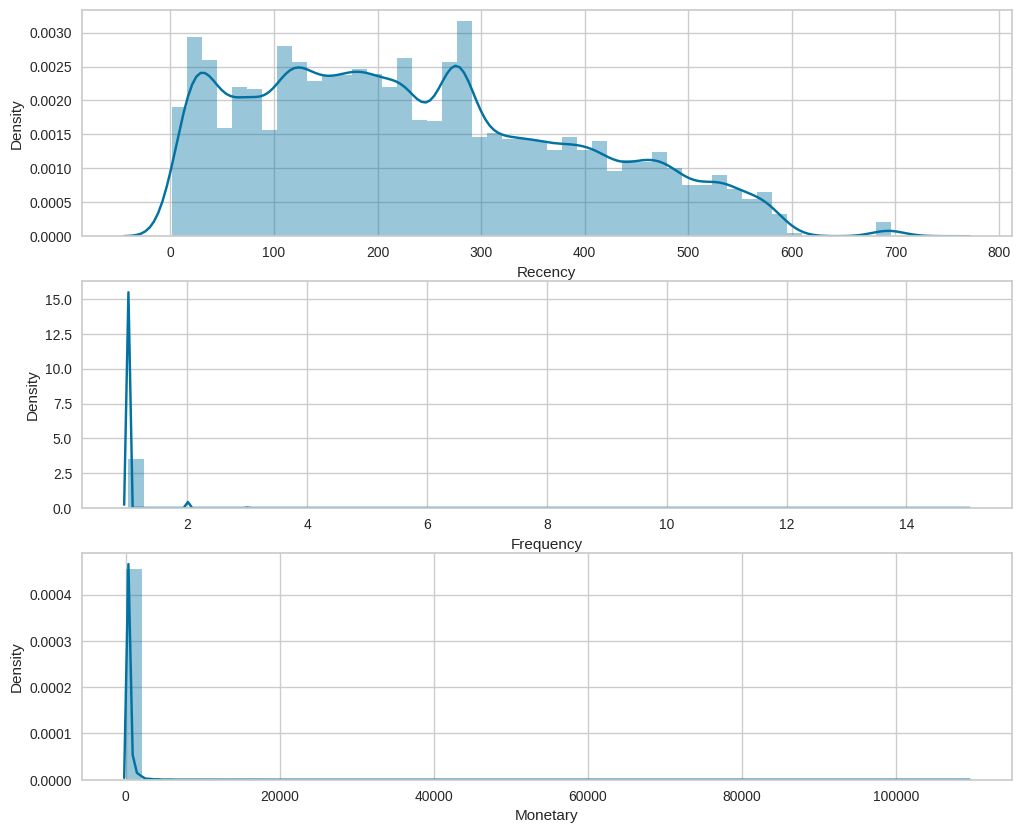

In [47]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(RFM_df['Recency'])
plt.subplot(3, 1, 2); sns.distplot(RFM_df['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(RFM_df['Monetary'])
plt.show()

In [48]:
RFM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93000 entries, 0 to 92999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  93000 non-null  object 
 1   Recency             93000 non-null  int64  
 2   Frequency           93000 non-null  int64  
 3   Monetary            93000 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.8+ MB


check outliers


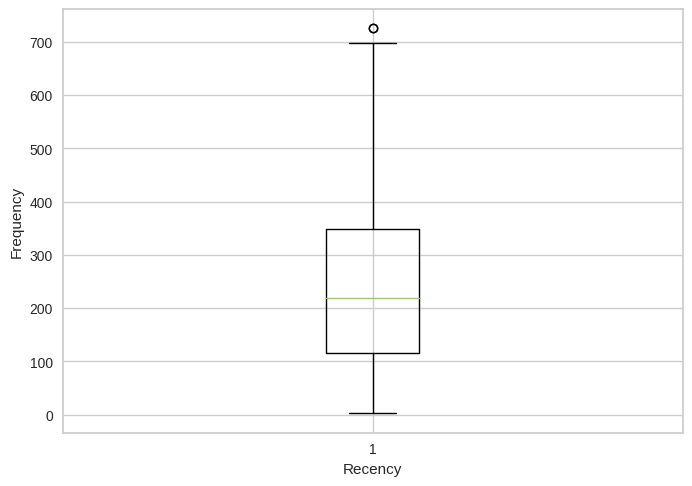

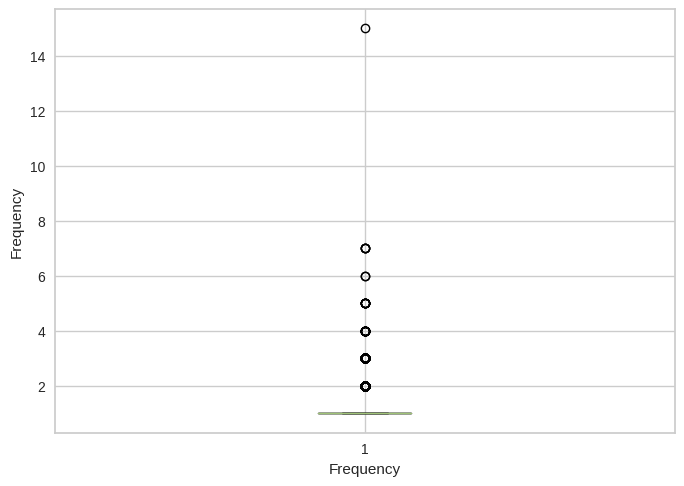

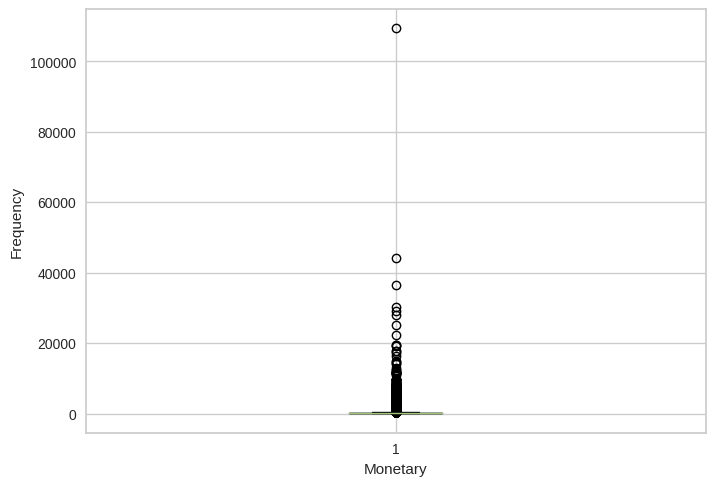

In [49]:
for i in ["Recency", "Frequency", "Monetary"]:
    plt.figure()
    plt.tight_layout()
    plt.gca().set(xlabel= i, ylabel='Frequency')
    plt.boxplot(RFM_df[i])

In [50]:
# outliers that fall with +/- 5% boundaries
def num_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return print("Number of outliers in {} column: ".format(col_name), len(outliers_df)), print("Indexes: ", outliers_df.index)

In [51]:
for i in ["Recency", "Frequency", "Monetary"]:
    num_outlier(RFM_df, i)
    print("*"*40)

Number of outliers in Recency column:  0
Indexes:  Index([], dtype='int64')
****************************************
Number of outliers in Frequency column:  2206
Indexes:  Index([  103,   119,   139,   242,   402,   417,   426,   436,   465,   467,
       ...
       92245, 92354, 92387, 92394, 92408, 92465, 92568, 92832, 92848, 92956],
      dtype='int64', length=2206)
****************************************
Number of outliers in Monetary column:  1023
Indexes:  Index([  128,   220,   255,   287,   414,   537,   569,   606,   612,   702,
       ...
       92644, 92649, 92674, 92724, 92770, 92822, 92842, 92906, 92988, 92995],
      dtype='int64', length=1023)
****************************************


In [52]:
RFM_df.shape

(93000, 4)

In [53]:
# remove outliers that fall with +/- 5% boundaries, except Frequency columns
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    index_outliers= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)].index
    df_in= pd.DataFrame(df_in.drop(index_outliers.to_list(), axis=0, inplace=True))
    print("Outliers in the {} column have been removed".format(col_name))
    return df_in

In [54]:
for i in ["Recency", "Monetary"]:
    remove_outlier(RFM_df, i)
    print("*"*40)

Outliers in the Recency column have been removed
****************************************
Outliers in the Monetary column have been removed
****************************************


In [55]:
RFM_df.shape

(91977, 4)

In [56]:
RFM_df2= RFM_df.copy()
RFM_df2= RFM_df2.set_index('customer_unique_id')
RFM_df2

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19
0000f46a3911fa3c0805444483337064,538,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
0004aac84e0df4da2b147fca70cf8255,289,1,196.89
...,...,...,...
fffcc512b7dfecaffd80f13614af1d16,142,1,710.70
fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58
ffff371b4d645b6ecea244b27531430a,569,1,112.46


rfm segments

In [57]:
RFM_df2["recency_score"]  = pd.qcut(RFM_df2['Recency'], 5, labels=[5, 4, 3, 2, 1])
RFM_df2["frequency_score"]= pd.qcut(RFM_df2['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
RFM_df2["monetary_score"] = pd.qcut(RFM_df2['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [58]:
# Concatanated RFM scores:
RFM_df2['RFM_SCORE'] = RFM_df2.recency_score.astype(str)+ RFM_df2.frequency_score.astype(str) + RFM_df2.monetary_score.astype(str)
RFM_df2

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,4,1,4,414
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19,4,1,1,411
0000f46a3911fa3c0805444483337064,538,1,86.22,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,289,1,196.89,2,1,4,214
...,...,...,...,...,...,...,...
fffcc512b7dfecaffd80f13614af1d16,142,1,710.70,4,5,5,455
fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58,3,5,2,352
ffff371b4d645b6ecea244b27531430a,569,1,112.46,1,5,3,153


In [59]:
RFM_df2["recency_score"]  = pd.qcut(RFM_df2['Recency'], 5, labels=[5, 4, 3, 2, 1])
RFM_df2["frequency_score"]= pd.qcut(RFM_df2['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
RFM_df2["monetary_score"] = pd.qcut(RFM_df2['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [60]:
# Concatanated RFM scores:
RFM_df2['RFM_SCORE'] = RFM_df2.recency_score.astype(str)+ RFM_df2.frequency_score.astype(str) + RFM_df2.monetary_score.astype(str)
RFM_df2

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,4,1,4,414
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19,4,1,1,411
0000f46a3911fa3c0805444483337064,538,1,86.22,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,289,1,196.89,2,1,4,214
...,...,...,...,...,...,...,...
fffcc512b7dfecaffd80f13614af1d16,142,1,710.70,4,5,5,455
fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58,3,5,2,352
ffff371b4d645b6ecea244b27531430a,569,1,112.46,1,5,3,153


In [61]:
seg_map= {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers',
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [62]:
RFM_df2['Segment'] = RFM_df2['recency_score'].astype(str) + RFM_df2['frequency_score'].astype(str) + RFM_df2['monetary_score'].astype(str)
RFM_df2['Segment'] = RFM_df2['Segment'].replace(seg_map, regex=True)
RFM_df2.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,4,1,4,414,Promising
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19,4,1,1,411,New Customers
0000f46a3911fa3c0805444483337064,538,1,86.22,1,1,2,112,Lost customers
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,2,1,1,211,Hibernating customers
0004aac84e0df4da2b147fca70cf8255,289,1,196.89,2,1,4,214,Cannot Lose Them


In [63]:
RFM_df2['Segment'].unique()

array(['Promising', 'New Customers', 'Lost customers',
       'Hibernating customers', 'Cannot Lose Them', 'About To Sleep',
       'Loyal', 'Champions', 'Potential Loyalist', 'At Risk',
       'Need Attention'], dtype=object)

In [64]:
RFM_df2['Segment'].nunique()

11

In [65]:
RFMStats = RFM_df2[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(['mean','median', 'min', 'max', 'count'])
RFMStats

Recency                         Frequency         \
                             mean median  min  max  count      mean median   
Segment                                                                      
About To Sleep         278.595300  279.0  179  384   5787  1.000346    1.0   
At Risk                387.830405  368.0  270  725  15991  1.030830    1.0   
Cannot Lose Them       437.208753  439.0  270  697   5758  1.033519    1.0   
Champions               85.574868   82.0    2  178   5690  1.176450    1.0   
Hibernating customers  343.781739  327.0  179  725   8302  1.000000    1.0   
Lost customers         476.559022  470.0  385  696   4583  1.002182    1.0   
Loyal                  178.242594  193.0    2  269   5874  1.061628    1.0   
Need Attention         156.385228  177.0    2  269   5646  1.000000    1.0   
New Customers          124.484287  128.0    2  269   5123  1.000000    1.0   
Potential Loyalist     131.557910  131.0    2  269  17415  1.015906    1.0   
Promising              106.726711   93.0    2  269  11808  1.000000    1.0   

                                        Monetary                            \
                      min max  count        mean   median     min      max   
Segment                                                                      
About To Sleep          1   2   5787   52.433188   44.640   10.07   137.28   
At Risk                 1   6  15991  241.564012  160.180   55.46  1592.64   
Cannot Lose Them        1   3   5758  281.260761  196.955   88.55  1590.25   
Champions               1  15   5690  357.931476  254.730  137.63  1591.22   
Hibernating customers   1   1   8302   79.174835   75.070   11.63   137.60   
Lost customers          1   3   4583   45.069204   43.100   12.28    88.32   
Loyal                   1   7   5874  316.693589  230.120   88.49  1589.44   
Need Attention          1   1   5646  231.025106  170.710   88.48  1594.76   
New Customers           1   1   5123   52.763777   51.050    9.59    88.45   
Potential Loyalist      1   3  17415   74.380314   70.120   10.89   137.60   
Promising               1   1  11808  232.231512  162.890   14.06  1594.44   

                              
                       count  
Segment                       
About To Sleep          5787  
At Risk                15991  
Cannot Lose Them        5758  
Champions               5690  
Hibernating customers   8302  
Lost customers          4583  
Loyal                   5874  
Need Attention          5646  
New Customers           5123  
Potential Loyalist     17415  
Promising              11808

In [66]:
RFMStats['Ratio']= (100*RFMStats['Monetary']["count"]/RFMStats['Monetary']["count"].sum()).round(2)
RFMStats

Recency                         Frequency         \
                             mean median  min  max  count      mean median   
Segment                                                                      
About To Sleep         278.595300  279.0  179  384   5787  1.000346    1.0   
At Risk                387.830405  368.0  270  725  15991  1.030830    1.0   
Cannot Lose Them       437.208753  439.0  270  697   5758  1.033519    1.0   
Champions               85.574868   82.0    2  178   5690  1.176450    1.0   
Hibernating customers  343.781739  327.0  179  725   8302  1.000000    1.0   
Lost customers         476.559022  470.0  385  696   4583  1.002182    1.0   
Loyal                  178.242594  193.0    2  269   5874  1.061628    1.0   
Need Attention         156.385228  177.0    2  269   5646  1.000000    1.0   
New Customers          124.484287  128.0    2  269   5123  1.000000    1.0   
Potential Loyalist     131.557910  131.0    2  269  17415  1.015906    1.0   
Promising              106.726711   93.0    2  269  11808  1.000000    1.0   

                                        Monetary                            \
                      min max  count        mean   median     min      max   
Segment                                                                      
About To Sleep          1   2   5787   52.433188   44.640   10.07   137.28   
At Risk                 1   6  15991  241.564012  160.180   55.46  1592.64   
Cannot Lose Them        1   3   5758  281.260761  196.955   88.55  1590.25   
Champions               1  15   5690  357.931476  254.730  137.63  1591.22   
Hibernating customers   1   1   8302   79.174835   75.070   11.63   137.60   
Lost customers          1   3   4583   45.069204   43.100   12.28    88.32   
Loyal                   1   7   5874  316.693589  230.120   88.49  1589.44   
Need Attention          1   1   5646  231.025106  170.710   88.48  1594.76   
New Customers           1   1   5123   52.763777   51.050    9.59    88.45   
Potential Loyalist      1   3  17415   74.380314   70.120   10.89   137.60   
Promising               1   1  11808  232.231512  162.890   14.06  1594.44   

                              Ratio  
                       count         
Segment                              
About To Sleep          5787   6.29  
At Risk                15991  17.39  
Cannot Lose Them        5758   6.26  
Champions               5690   6.19  
Hibernating customers   8302   9.03  
Lost customers          4583   4.98  
Loyal                   5874   6.39  
Need Attention          5646   6.14  
New Customers           5123   5.57  
Potential Loyalist     17415  18.93  
Promising              11808  12.84

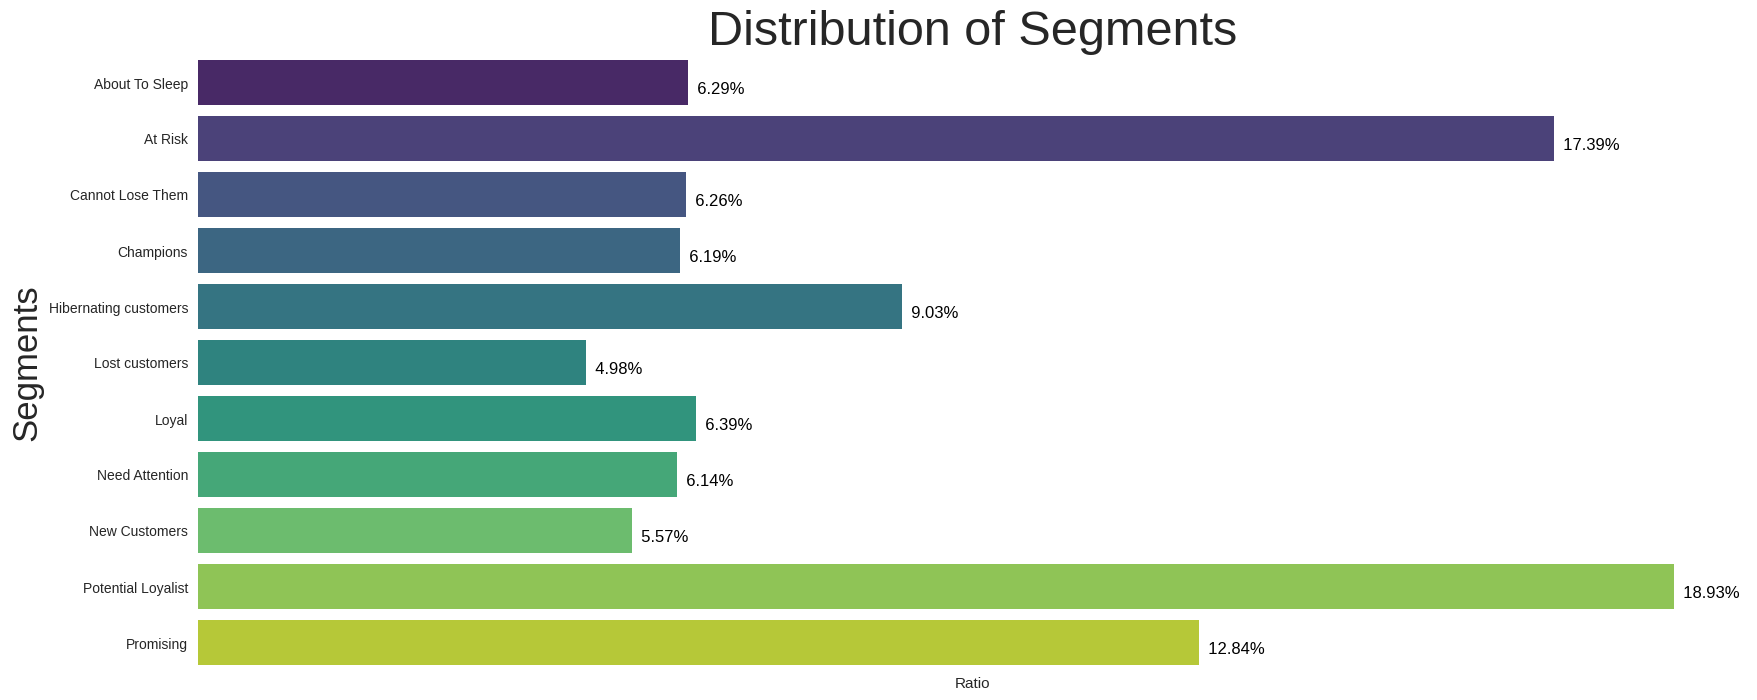

In [67]:
plt.figure(figsize=(20,8))
#plt.rc('font', size=20)
per= sns.barplot(x=RFMStats['Ratio'], y=RFMStats.index, data=RFMStats, palette="viridis")
sns.despine(bottom = True, left = True)
for i, v in enumerate(RFMStats['Ratio']):
    per.text(v, i+.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
per.set_ylabel('Segments', fontsize=25)
per.set(xticks=[])
plt.title('Distribution of Segments', fontsize=35)
plt.show()

Text(0.5, 0.98, 'Recency and Frequency Grid')

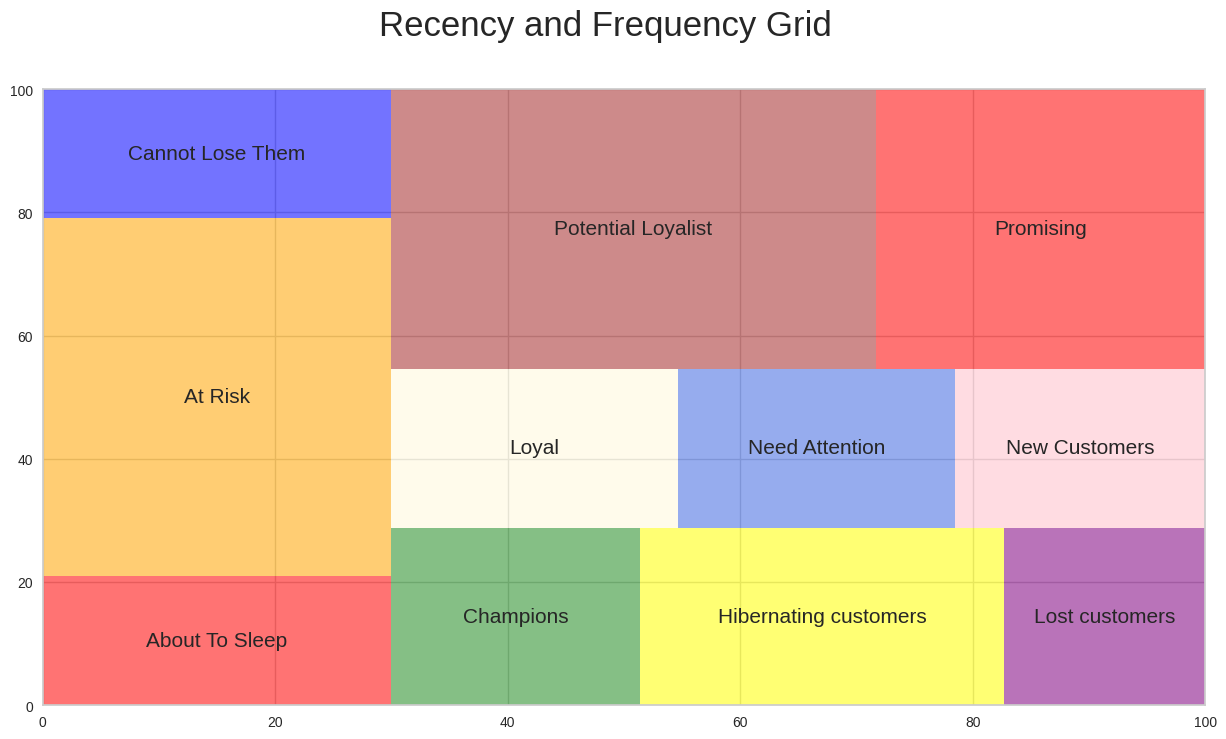

In [68]:
# Treemap by recency/frequency
plt.figure(figsize=(15,8))
plt.rc('font', size=15)
squarify.plot(sizes=RFMStats["Recency"]["count"], label=RFMStats.index,
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.55)
plt.suptitle("Recency and Frequency Grid", fontsize=25)

clustering

In [69]:
RFM_df3= RFM_df2.drop(["recency_score", "frequency_score", "monetary_score", "RFM_SCORE", "Segment"], axis=1)
RFM_df3

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19
0000f46a3911fa3c0805444483337064,538,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
0004aac84e0df4da2b147fca70cf8255,289,1,196.89
...,...,...,...
fffcc512b7dfecaffd80f13614af1d16,142,1,710.70
fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58
ffff371b4d645b6ecea244b27531430a,569,1,112.46


In [70]:
#check if data is skewed
from scipy import stats #library
def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    plt.show()
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

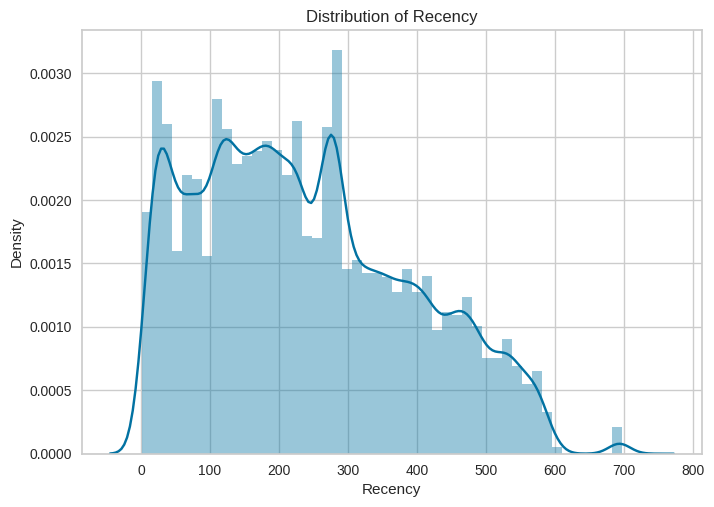

Recency's: Skew: 0.4532435564282202, : SkewtestResult(statistic=53.5789286421484, pvalue=0.0)


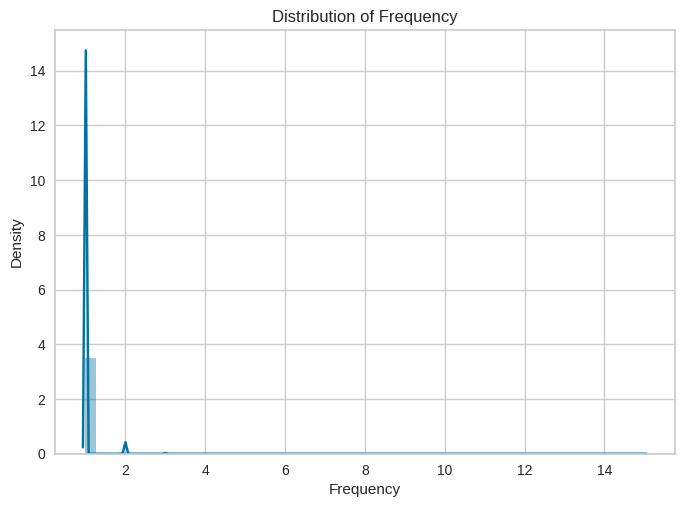

Frequency's: Skew: 13.223604389509108, : SkewtestResult(statistic=351.74300514618756, pvalue=0.0)


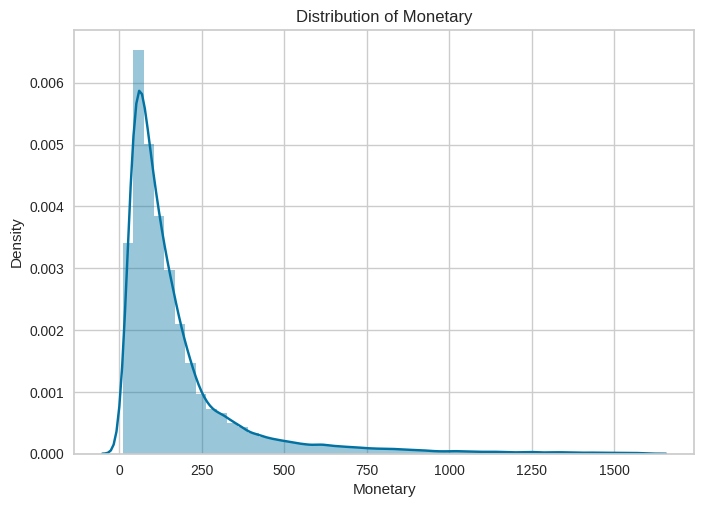

Monetary's: Skew: 3.1535353145913074, : SkewtestResult(statistic=208.35727861503352, pvalue=0.0)


In [71]:
for col in RFM_df3.columns:
    check_skew(RFM_df3, col)

In [72]:
# apply log transform for the Frequency and Monetary columns as they are very skewed
RFM_log= RFM_df3.copy()
for i in RFM_log.columns[1:]:
    RFM_log[i] = np.log10(RFM_log[i])

In [73]:
RFM_log

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,0.0,2.151982
0000b849f77a49e4a4ce2b2a4ca5be3f,116,0.0,1.434409
0000f46a3911fa3c0805444483337064,538,0.0,1.935608
0000f6ccb0745a6a4b88665a16c9f078,322,0.0,1.639686
0004aac84e0df4da2b147fca70cf8255,289,0.0,2.294224
...,...,...,...
fffcc512b7dfecaffd80f13614af1d16,142,0.0,2.851686
fffea47cd6d3cc0a88bd621562a9d061,263,0.0,1.927268
ffff371b4d645b6ecea244b27531430a,569,0.0,2.050998


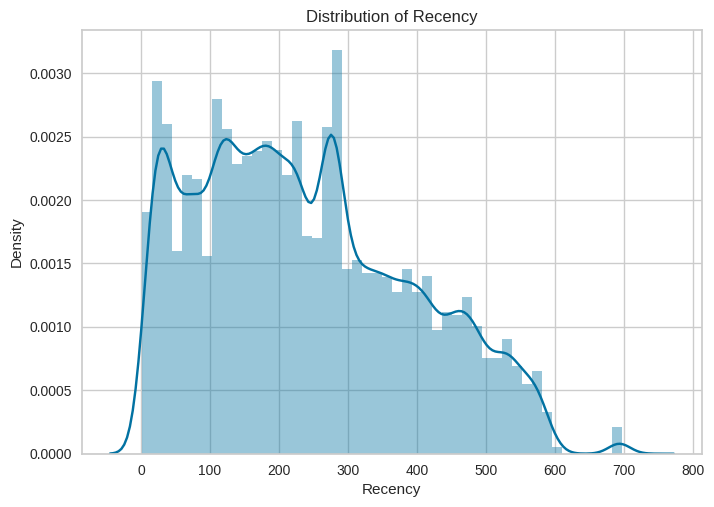

Recency's: Skew: 0.4532435564282202, : SkewtestResult(statistic=53.5789286421484, pvalue=0.0)


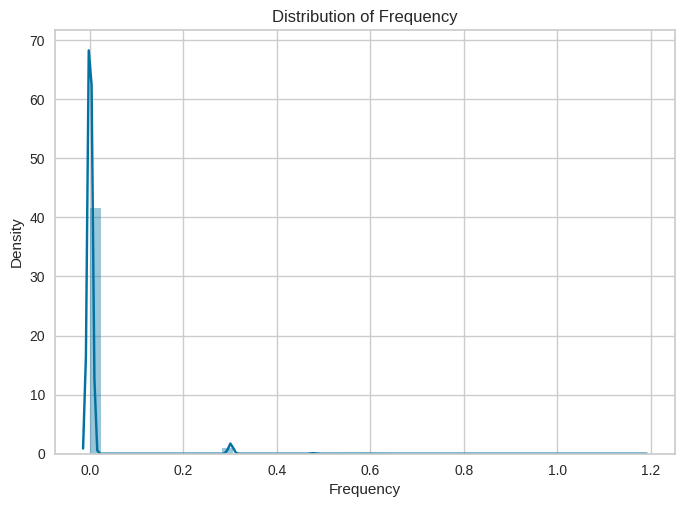

Frequency's: Skew: 6.94311906323528, : SkewtestResult(statistic=286.852341356518, pvalue=0.0)


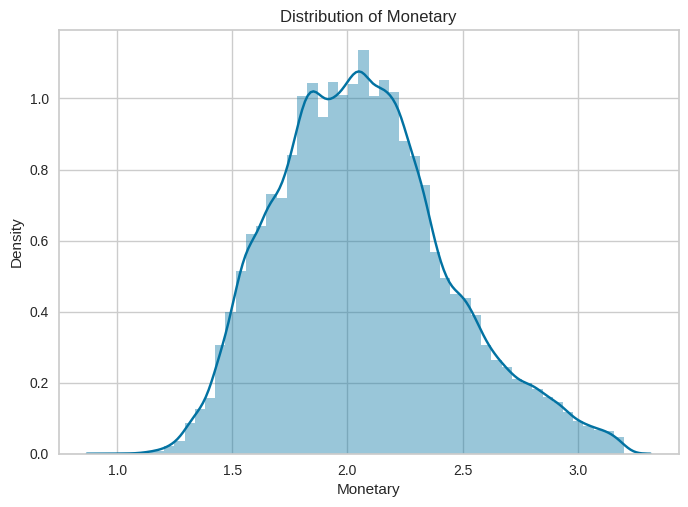

Monetary's: Skew: 0.4345218403369916, : SkewtestResult(statistic=51.54222361324475, pvalue=0.0)


In [74]:
for col in RFM_log.columns:
    check_skew(RFM_log, col)

In [75]:
# apply StandardScaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

RFM_log_scaled= scaler.fit_transform(RFM_log)
RFM_log_scaled_df= pd.DataFrame(RFM_log_scaled)
RFM_log_scaled_df.columns = ['recency', 'frequency', 'monetary']
RFM_log_scaled_df

,recency,frequency,monetary
0,-0.822667,-0.151094,0.224342
1,-0.803068,-0.151094,-1.705015
2,1.953873,-0.151094,-0.357429
3,0.542737,-0.151094,-1.153083
4,0.327147,-0.151094,0.606790
...,...,...,...
91972,-0.633209,-0.151094,2.105655
91973,0.157288,-0.151094,-0.379854
91974,2.156397,-0.151094,-0.047177
91975,-0.776936,-0.151094,0.154749


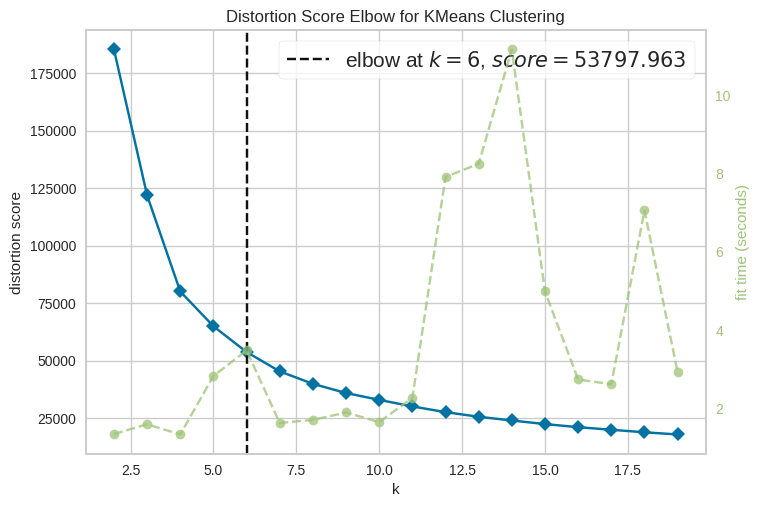

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
k_means = KMeans()
elbow = KElbowVisualizer(k_means, k=(2, 20))
elbow.fit(RFM_log_scaled_df)
elbow.show()

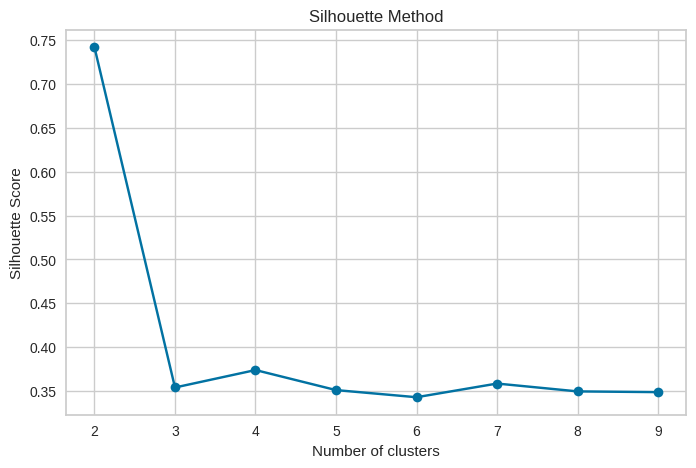

In [78]:
silhouette_scores = []
range_values = range(2, 10)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=20)
    kmeans.fit(RFM_log_scaled_df)
    score = silhouette_score(RFM_log_scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range_values, silhouette_scores, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()

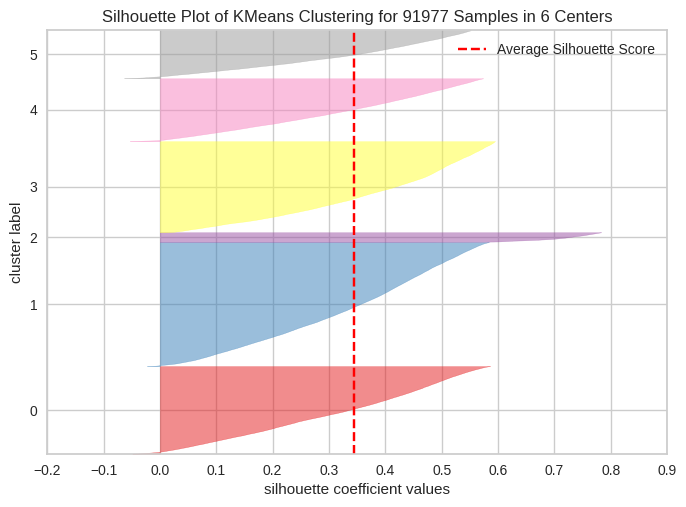

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 91977 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [79]:
# Số lượng cụm tối ưu từ biểu đồ Elbow
optimal_clusters = elbow.elbow_value_

k_means_optimal = KMeans(n_clusters=optimal_clusters, random_state=10)
silhouette_visualizer = SilhouetteVisualizer(k_means_optimal)

silhouette_visualizer.fit(RFM_log_scaled_df)
silhouette_visualizer.show()

In [80]:
kmeans= KMeans(n_clusters=elbow.elbow_value_)
kmeans.fit(RFM_log_scaled_df)

KMeans(n_clusters=6)

In [81]:
RFM_log_scaled_df['Cluster']= kmeans.labels_
RFM_log_scaled_df

,recency,frequency,monetary,Cluster
0,-0.822667,-0.151094,0.224342,0
1,-0.803068,-0.151094,-1.705015,4
2,1.953873,-0.151094,-0.357429,1
3,0.542737,-0.151094,-1.153083,1
4,0.327147,-0.151094,0.606790,2
...,...,...,...,...
91972,-0.633209,-0.151094,2.105655,5
91973,0.157288,-0.151094,-0.379854,1
91974,2.156397,-0.151094,-0.047177,2
91975,-0.776936,-0.151094,0.154749,0


In [82]:
# Function to visualize clusters
def rfm_clusters_stat(df):
    df_new = df.groupby(['Cluster']).agg({
            'Recency'  : ['mean','median', 'min', 'max'],
            'Frequency': ['mean','median', 'min', 'max'],
            'Monetary' : ['mean','median', 'min', 'max', 'count']
        }).round(0)

    return df_new

In [83]:
RFM_df4= RFM_df3.copy()
RFM_df4['Cluster'] = kmeans.labels_
RFM_df4

,Recency,Frequency,Monetary,Cluster
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,0
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19,4
0000f46a3911fa3c0805444483337064,538,1,86.22,1
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,1
0004aac84e0df4da2b147fca70cf8255,289,1,196.89,2
...,...,...,...,...
fffcc512b7dfecaffd80f13614af1d16,142,1,710.70,5
fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58,1
ffff371b4d645b6ecea244b27531430a,569,1,112.46,2


In [84]:
rfm_clusters_stat(RFM_df4).style.background_gradient(cmap='YlGnBu')

In [ ]:
RFM_stats= pd.DataFrame(rfm_clusters_stat(RFM_df4))

In [88]:
plt.figure(figsize=(10, 6))
squarify.plot(sizes=RFM_stats["Monetary"]["count"], label=RFM_stats.index, color=["b","g","r","m","c", "y"], alpha=0.7)
plt.suptitle("Segments of Customers", fontsize=25)

NameError: name 'RFM_stats' is not defined

<Figure size 1000x600 with 0 Axes>

**Data before clustering**

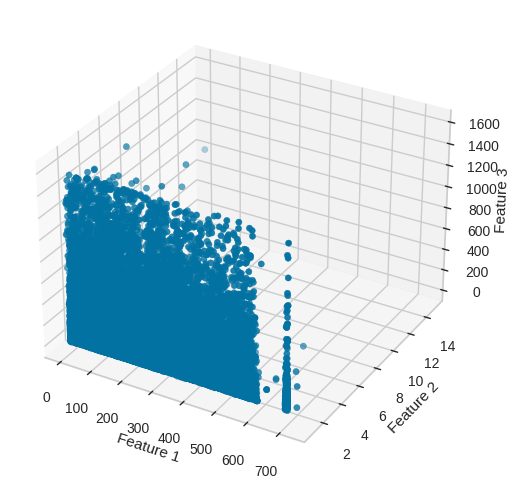

In [89]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(RFM_df4.iloc[:, 0],
           RFM_df4.iloc[:, 1],
           RFM_df4.iloc[:, 2])

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()

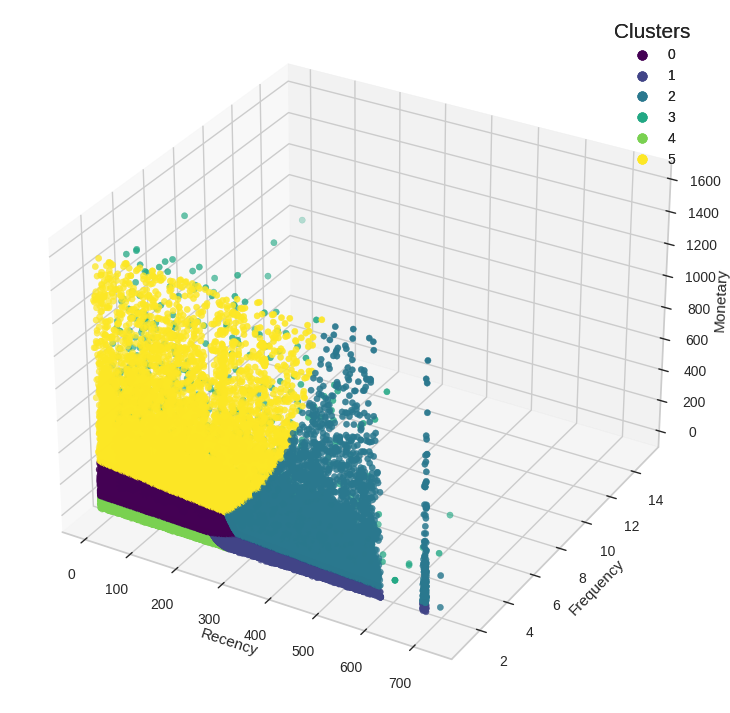

In [90]:
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot the filtered DataFrame
scatter = ax.scatter(RFM_df4['Recency'], RFM_df4['Frequency'], RFM_df4['Monetary'], c=RFM_df4['Cluster'], cmap='viridis')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Create a legend for the colors
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

In [91]:
def visualize3DKmeans(RFM_df4, columns, hover_data, cluster):
    fig = px.scatter_3d(RFM_df4,
                    x=columns[0],
                    y=columns[1],
                    z=columns[2],
                    color='Cluster',
                    hover_data=hover_data,
                    category_orders={"Cluster": range(0, cluster)},
                    )

    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.show()

In [92]:
columns = RFM_df4.columns.tolist()
hover_data=RFM_df4.columns
visualize3DKmeans(RFM_df4, columns,hover_data, 5)